In [1]:
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

## Chapter 13 푸리에 급수로 음파 분석하기
#### 디지털 오디오 데이터는 컴퓨터로 표현한 음파이며 음파는 기압이 반복적으로 변화하며 귀가 소리로 인식하는 것이다.
#### 음파를 함수로 생각하면 벡터처럼 더하거나 확대, 축소가 가능하다.
#### 음파가 나타내는 소리의 종류를 파악하고자 적분을 사용할 수도 있다.
#### 디지털 오디오 파일은 시간에 대한 진동을 묘사하는 함수로 볼 수 있다.
#### 오디오 소프트웨어는 이 함수를 번역하고 함수에 따라 스피커가 진동하도록 지시한다.
#### 함수가 시간에 따라 기압 변화를 나타낸다는 정도로 생각하면 된다.
#### 음표가 나타내는 소리 또한 패턴이 반복되는 음파로 나타낼수 있고 이 함수가 스스로 반복하는 속도를 `주파수`라고 한다.
#### 주파수는 음표가 나타내는 소리의 고저를 알려준다.
#### 음질 또는 음색은 음성과 같이 패턴이 반복하는 모양에 따라 달라진다.
---
## 13.1 음파를 결합하고 분해하기
#### 기존 음파를 결합해 새 음파를 만드는 작업과 복잡한 음파를 간단한 음파들로 분해하는 작업 두가지를 진행할 것이다.
#### 함수에 대응하는 소리를 만들기 위해 해당 함수의 그래프에서 몇몇 y값을 추출하고 배열 형태로 오디오 라이브러리에 전달하는 샘플링 작업을 한다.
#### 주요 음파 함수는 주기함수인데 주기함수의 그래프는 같은 모양이 반복되어 만들어진다.
#### 정현함수를 주로 사용할 것인데 정현함수는 자연스럽게 들리는 음표를 생성하는 sin,cos함수를 포함하는 주기 함수의 집합이다.
#### 정현함수를 샘플링해서 수열을 만들고 음표를 재생하는 함수를 만들 것이다.
#### 개별 음표를 만들면 여러 음표를 합쳐 화음 또는 여러가지 소리를 재생할 수 있다.
#### 이렇게하기 위해 각 음파를 정의하는 함수를 더하면 된다.
#### 반대로 음파를 나타내는 함수를 분해해서 각 음파를 만드는 음표와 음량의 곱의 합으로 표현할 수 있다.
#### 이런것을 푸리에 급수라고 한다. 푸리에 급수를 구성하는 음파를 알고 있으면 이를 합쳐서 원래의 소리를 얻을 수 있다.
#### 푸리에 급수를 구하는 과정을 수학적으로 보면 어떤 함수를 sin, cos함수의 합으로 나타내는 것이다.
---
## 13.2 파이썬으로 음파 재생하기
#### PyGame 라이브러리를 사용할 것이다. PyGame 라이브러리에는 수 배열을 입력으로 받아 소리를 재생하는 함수가 있다.
#### 랜덤한 수열을 만들고 라이브러리를 사용해 수열을 번역해 소리를 재생하는 코드를 만들것이다.
### 13.2.1 소리를 처음으로 만들어보기
#### 샘플링 주파수를 44,100Hz로 설정할 것이다. 이러한 설정에서 오디오 데이터는 초당 44,100개의 성분을 가지는 배열로 나타난다.
#### 각 성분은 -32,768 ~ +32,768 사이의 값을 가지는 16비트 정수이다. 
#### 각 타임스텝에서 소리의 강도를 나타내며 1초당 타임스텝은 44,100번 있다.
#### 소리의 비트 심도를 설정해야하는데 주파수가 이미지의 해상도와 유사한 것처럼 비트심도는 허용되는 픽셀 색상의 수와 비슷하다.
#### 비트 심도가 높으면 소리 강도의 범위가 더 세밀하다고 할 수 있는 것이다.

In [2]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size = -16, channels=1)

pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import numpy as np
arr = np.random.randint(-32768,32767, size = 44100)
#arr = np.repeat(arr.reshape(44100,1), 2,axis=1)

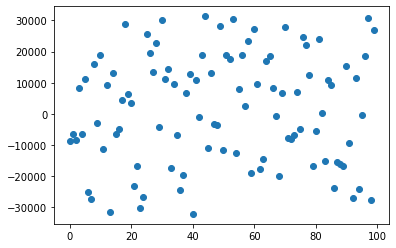

In [4]:
plot_sequence(arr,line=False) # 처음 100개의 산점도 확인

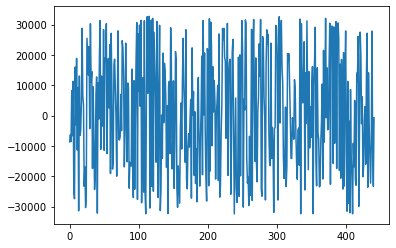

In [5]:
plot_sequence(arr, line = True, max = 441)

#### 44,100개의 값은 1초짜리 소리를 정의하므로 441개의 값은 100분의 1초짜리 소리를 정의힌다.

In [7]:
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)

sound.play()

In [9]:
arr = np.random.randint(-10000, 10000, size=44100)
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

#### 재생하면 랜덤으로 만들어진 소음이 나온다. 
#### 이런 소음은 오직 볼륨만 조정 가능하다.
#### 음파의 크기는 함숫값이 얼마나 큰가에 따라 달라지는데, 이 척도를 음파의 진폭이라고 한다.
#### 위에 조금 작은 소음을 보면 평균 0에서 10,000 단위 범위에서 변한다.
#### 이런 경우에는 진폭은 10,000이라고 할 수 있다.
---
### 13.2.2 음표 재생하기
#### 음표는 보통 백색소음의 랜덤성과는 대조적으로 진동 패턴을 탐지한다.
#### 음파의 진폭을 10,000으로 설정해서 음을 만들어 보겠다.

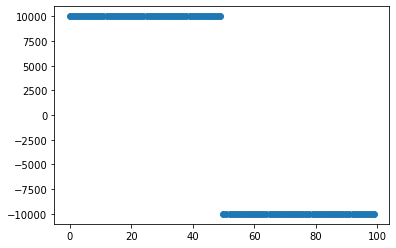

In [10]:
form = np.repeat([10000,-10000],50) #<1>
plot_sequence(form)

In [11]:
arr = np.tile(form,441)
# 100개의 항이 있는 수열 441번 반복해 총 44,100개를 얻을 수 있고 1초에 해당한다.

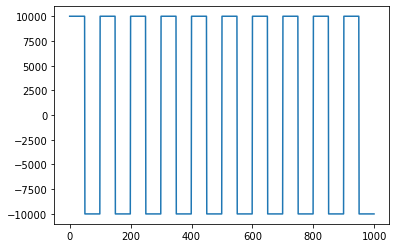

In [12]:
plot_sequence(arr,line=True,max=1000)

#### 위의 파형은 그래프가 90도인 모서리를 가지고 있어 사각파라고 한다.
#### 모든 지점을 선으로 연결했기때문에 y축과 평행한 선이 생기지만 실제로는 10,000과 -10,000인 값만 존재한다.
#### 샘플링 주파수를 44,100Hz로 설정했기 때문에 44,100개의 수는 1초를 나타낸다.
#### 1,000개의 수는 1/44.1 초짜리 오디오를 나타낸다.

In [14]:
arr= np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)

sound.play()

#### 100개의 수로 이루어진 수열의 반복 빈도는 이 수열을 반복해 만든 음파의 주파수라고 한다.
#### 음파의 주파수는 음높이라고 부르는 음의 소리가 높게 들리는지 낮게 들리는지를 결정하게된다.
#### 반복빈도는 Hz라고 표기하는 헤르츠 단위다.
#### 441Hz는 초당 441회 반복한다는 것이다.
#### 주기함수는 사각파처러 정해진 구간마다 함숫값이 반복된다. 사각파에서 반복되는 수열은 100개의 수로 이루어져있으며, 441번 반복하면 1초에 44,100개의 수로 이루어진 오디오가 된다.
#### 이런 반복빈도를 탐지해 음표의 음을 특정할 수 있게 된다.
---
## 13.3 정현파를 소리로 변환하기
#### 사각파는 자연스럽지 않다.
#### 우리가 자연에서 듣는 소리는 사각파가 아닌 사인곡선적으로 나타난다.
#### 이 진동을 측정해 그래프로 그리면 사인함수나 코사인 함수그래프와 비슷한 결과가 나온다.
---
### 13.3.1 정현 함수로 오디오 만들기
#### 사인 함수와 코사인 함수는 본질적으로 주기함수이다.
#### 각을 2파이라디안 만큼 회전하면 함수값이 시작점으로 돌아오는 것이 반복된다.
#### 이런 반복 간격을 주기함수의 `주기`라고 한다.
#### sin과 cos함수의 주기는 모두 2π라이안이다.
#### cos함수는 sin함수의 그래프를 왼쪽으로 π/2만큼 평행이동한 그래프와 동일하다.
#### 오디오가 2π초 마다 1번씩 반복되는 것은 주파수가 1/2πHz을 의미하는데 이 값은 너무 낮아서 우리의 귀로 차이점을 알 수 없다.
#### 이런 문제를 해결하기 위해 make_sinusoid함수를 만들것이다. 
#### 이 함수는 주파수와 진폭이 더 좋아지도록 사인 함수를 수직이나 수평으로 확대, 축소하게 된다.
#### 즉 우리가 듣기 좋게 함수를 변형하는 것이다.

---
### 13.3.2 정현 함수의 주파수 바꾸기
#### t=0, t=1 사이에서 그래프가 두번 반복하는 즉 주파수가 2인 정현함수를 생성할 것이다.
#### sin 함수의 주기는 2π이므로 사인 함수가 두번 반복되려면 4π의 시간이 소요될 것이다.
#### sin함수 그래프를 두 주기만큼 얻기위해서는 0부터 4π값이 들어가야 한다.
#### 하지만 t의 값이 0부터 1사이에서 결정되어야한다.
#### 이것은 sin(4πt)로 만들어 두가지 문제를 모두 해결할 수 있다.
#### 함수 sin(4πt)의 주기는 1/2가 된다. 원래 함수의 주기보다 1/4π가 된것이다.
#### 위에서 본것처럼 일반적으로 임의의 상수 k에 대해 f(t) = sin(kt) 함수의 주기는 k배 만큼 축소된 2π/k가 된다.
#### 이런 함수의 주파수는 sin함수의 원래 주파수인 1/2π에 k를 곱한 k/2π로 늘어난다.
#### 정형화해보면 정현함수의 진폭을 늘리기 위해서는 앞의 sin함수에 상수 인수를 곱하면 곱한 인수 배만큼 진폭이 증가하게된다는 것이다.

In [15]:
from math import * 
def make_sinusoid(frequency, amplitude):
    def f(t): # 리턴될 정현 함수 f(t)를 정의한다.
        return amplitude * sin(2*pi*frequency*t) # 입력 t에 2π와 주파수를 곱하고 sin함수의 출력에 진폭을 곱해준다.
    return f

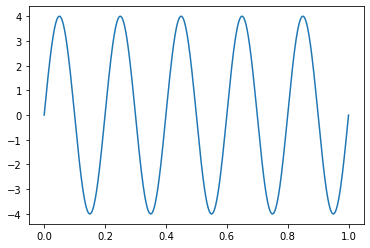

In [16]:
plot_function(make_sinusoid(5,4),0,1) # 주파수=5, 진폭=4 인 정형함수의 1초동안 움직임을 플로팅

---
### 13.3.3 음파의 샘플링과 재생하기

In [17]:
sinusoid = make_sinusoid(441,8000)

#### t=0에서 t=1까지 정의된 sinusoid함수가 재생하려는 1초짜리 음파를 나타내면 0과 1사이의 t값을 일정한 간격으로 44,100개 추출하면 함숫값은 sinusoid(t)값에 대응한다.

In [18]:
np.arange(0,1,1/44100) # 0과 1사이의 시간 값을 44100개로 나눠 생성

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [19]:
def sample(f,start,end,count): 
    mapf = np.vectorize(f) # Numpy배열에 적용할 수 있도록 vectorize화
    ts = np.arange(start,end,(end-start)/count) # 함수에 입력할 값을 주어진 범위에서 일정한 간격으로 생성
    values = mapf(ts) # 함수에 적용
    return values.astype(np.int16) # 16비트 정숫값으로 변환해 결과 리턴

In [20]:
sinusoid = make_sinusoid(441,8000)
arr = sample(sinusoid,0,1,44100)
arr= np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

## 13.4 음파를 결합해 새 음파 만들기
#### 함수를 더하거나 스칼라곱을 해 새 함수를 만들 수 있다.
#### 두 음파를 결합하는 가장 간단한 방법은 두 음파를 모두 샘플링한 다음 두 배열의 대응하는 값끼리 더해서 새음파를 만드는 것이다.
#### 또 다른 방법으로는 일차결합으로 서로 다른 주파수를 가진 수십개의 정현파를 더하는 것이다.
---
### 13.4.1 샘플링된 음파를 더해 화음 만들기
#### 두 개의 샘플링된 음파를 연산으로 더하면 두 소리를 동시에 재생하는 것 같은 소리가 된다.

In [37]:
sample1 = sample(make_sinusoid(441,8000),0,1,44100)
sample2 = sample(make_sinusoid(551,8000),0,1,44100)

In [34]:
sample1= np.repeat(sample1.reshape(44100,1), 2,axis=1)
sound1 = pygame.sndarray.make_sound(sample1)
sample2= np.repeat(sample2.reshape(44100,1), 2,axis=1)
sound2 = pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [35]:
chord = pygame.sndarray.make_sound(sample1+sample2)
chord.play()

---
### 13.4.2 두 음파의 합 그리기
#### sample1(441Hz)와 sample2(551Hz)의 처음 400개 점을 그려보자.
#### sample1은 네번의 주기로 이루어져 있지만 sample2는 다섯번의 주기로 이루어져있다.

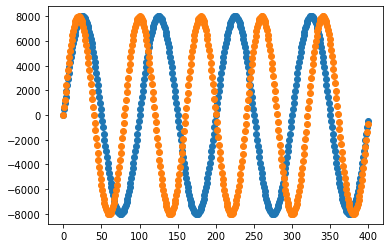

In [38]:
plot_sequence(sample1,max=400)
plot_sequence(sample2,max=400)

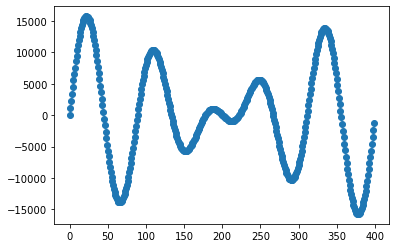

In [39]:
plot_sequence(sample1+sample2,max=400)

#### 두개의 정현파를 합친 결과이다. 
#### 정현파를 두개 결합한다고 해도 그 결과가 정현파가 되는것은 아니다.
#### 두 음파가 정렬되어 굴곡이 맞아떨어지면 음파의 합은 더욱 커지는데 이를 `보강간섭`이라고 한다.
#### 반대로 두 음파가 서로를 상쇄할때 `상쇄간섭`이라고 한다.
#### 두 음파는 주파수가 다르므로 보강간섭과 상쇄간섭이 번갈아 일어나며 서로 들락날락한다.
#### 결론적으로 음파의 합은 정현파가 아니라 시간에 따라 진폭이 변화하는 것 처럼 보이게 되는것이다.
---
### 13.4.3 정현 함수의 일차결합 만들기
#### 주파수가 서로 다른 정현 함수 집합부터 시작해보자
####  sin(2πt), sin(4πt), sin(6πt)과 같이 sin(2nt)을 만족하는 리스트가 있다고 해보자
####  이 함수들의 주파수는 1,2,3,4...n 으로 될것이다. 
#### 여기서 주파수가 다른 정현 함수들이 매우 많이 존재한다면 정현 함수들의 일차결합을 통해 다양한 모양을 만들어 낼 수 있다.
#### 일차결합의 모형을 보면 a0 + b1sin(2πt) + b2sin(4πt) + b3sin(6πt) + b4sin(8πt)+ .... + bnsin(2πnt)가 된다.
#### 물론 뒤에 cos함수도 리스트를 만들어 붙일 수 있다.
#### 이런 일차결합은 푸리에급수의 일종으로 변수 t에 대한 함수이다.
#### 이 일차결합은 상수항 an, cos함수의 계수 a1 ~ an, sin함수의 계수 b1 ~ bn이라는 2n+1개의 수에 의해 명시된다. 
#### 이것을 fourier_series 함수로 만들어보겠다.

In [40]:
def const(n): # 상수 값은 1
    return 1
def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t)
                    for (n,an) in enumerate(a)] # 모든 cos항과 각 항에 대응하는 상수를 곱해 리스트 생성
        sin_terms = [bn*sin(2*pi*(n+1)*t)
                    for (n,bn) in enumerate(b)] # 모든 sin항과 각 항에 대응하는 상수를 곱해 리스트 생성
        return a0 * const(t) + sum(cos_terms) + sum(sin_terms) 
        # 상수 계수 a0와 상수 함수 (1)의 값을 곱한 뒤 앞의 두 리스트와 함께 모두 더함. 
    return result

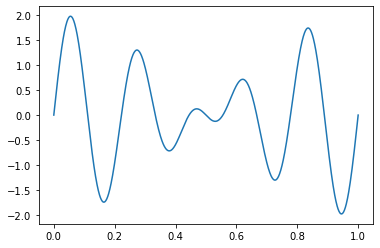

In [41]:
f = fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])
# b4 = 1, b5= 1로 두고 나머지는 모두 0 대입
# 즉 sin(8πt)+sin(10πt) 표현
plot_function(f,0,1)

### 13.4.4 정현함수로 익숙한 함수 만들기
#### 푸리에 급수를 만들것이다.
#### bn에 대해 모든 짝수 n 은 bn = 0이고, 모든 홀수 n에 대해 bn = 4/(nπ)로 설정하겠다.

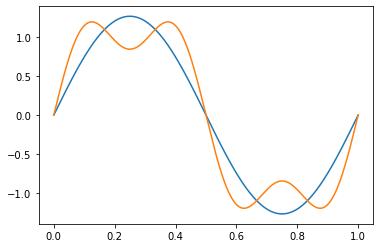

In [42]:
f1 = fourier_series(0,[],[4/pi])
f3 = fourier_series(0,[],[4/pi,0,4/(3*pi)])
plot_function(f1,0,1)
plot_function(f3,0,1)

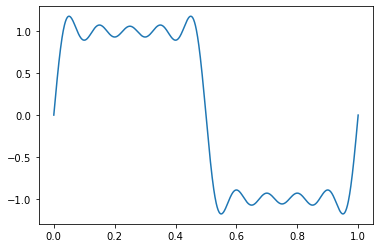

In [43]:
b = [4/(n*pi) if n%2 != 0 else 0 for n in range(1,10)] 
# 나머지가 0이 아니면 bn = 4/(n*pi), 0이면 bn=0출력
f = fourier_series(0,[],b)
plot_function(f,0,1)

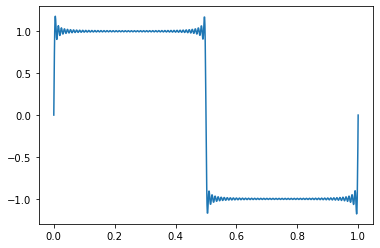

In [44]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0,[],b)
plot_function(f,0,1)

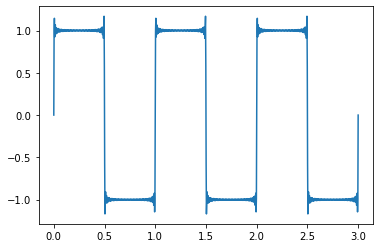

In [45]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0,[],b)
plot_function(f,0,3)

#### 그림을 축소해보면 초반에 그렸던 사각파와 비슷하게 생긴것을 볼 수 있다.
#### 정현 함수의 일차결합으로 사각파 함수를 근사할 수 있다는 것이다.
---
## 13.5 음파를 푸리에 급수로 분해하기
#### 임의의 주기함수를 입력으로 받아, 정현 함수의 일차결합으로 주기함수를 나타내는 법을 보겠다.
#### 임의의 음파를 순수한 음의 조합으로 쪼개는 것이다.
#### 쉽게말하면 위에서 했던것을 반대로 하는것이다.
#### 함수를 푸리에 급수로 분해하는 과정은 벡터를 기저 벡터의 일차결합으로 나타내는 것과 유사하다.
#### 주기가 1인 주기함수 f와 원하는 계수의 개수 N을 입력으로 받는 fourier_coefficients(f,N)함수를 만들 것이다.
#### fourier_coefficients함수는 상수 함수 및 1=< N < N인 모든 함수 cos(2nπt)와 sin(2nπt)를 함수 벡터공간의 각 방향으로 간주해 각 방향에서 f의 성분을 구한다.
#### 이 함수는 상수 함수를 나타내는 푸리에 계수 a0, 푸리에 계수의 리스트 a1, a2, a3...., an 푸리에 계수의 리스트 b1,b2,,,bn 을 결과로 리턴한다.
---
### 13.5.1 내적으로 벡터성분 찾기
#### 벡터에 대한 내적과 비슷하게 함수에 대한 내적이 필요하다.
#### 정현함수를 기저로 사용해서 함수의 성분을 구할 것이다.
#### v=(3,4,5)인 벡터가 있다고 하겠다.
#### 표준기저 벡터와 v를 내적하면 각 성분 하나를 얻는다.
#### v * e1 = (3,4,5) * (1,0,0) = 3
#### v * e2 = (3,4,5) * (0,1,0) = 4
#### v * e3 = (3,4,5) * (0,0,1) = 5
#### 또한 e1 * e2 = e2 * e3 = e1 * e3 = 0이며 각 e1^2, e2^2, e3^2 = 1이다.
#### 내적 결과를 보면 각 표준 기적벡터가 다른 표준 기저벡터 방향에서의 성분을 포함하지 않는다는 것을 알 수 있다.
#### 각 표준 기저 벡터는 자기 방향에서의 성분이 1이다.
#### 함수의 내적에서도 동일하게 작용해야 한다. 즉 sin(2πt), cos(2πt) 등과 같은 기저 함수에서 서로 다른 두 함수를 어떻게 선택하더라도 모두 수직이며 길이는 1이 되어야 한다.
---
### 13.5.2 주기 함수의 내적 정의하기
#### f(t)와 g(t)가 t=0 ~ 1 까지 정의된 함수이고, t의 한 단위마다 반복된다고 가정하겠다.
#### 내적의 정적분을 리만합으로 근사해서 파이썬 코드로 만들겠다.

In [50]:
def inner_product(f,g,N = 1000):
    dt = 1/N # 타임스텝 0.001
    return 2 *sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)]) 

#### 벡터의 내적과 마찬가지로 적분 근사는 두 입력 벡터에서 얻은 값끼리 곱한 뒤 합한 것이다.
#### 벡터의 내적이 좌표의 곱의 합인것과는 달리 적분 근사는 함숫값의 곱의 합이라는 차이점이 있다.
#### 함수값을 무수히 많은 좌표의 집합으로 간주하면 이 내적은 좌표들에 대한 일종의 무한 차원 내적이라고 할 수 있다.
#### 기저의 n번째 sin함수와 cos함수를 만들어내는 함수를 정의하고 inner_product 함수로 테스트하겠다.

In [48]:
def s(n): # s(n)은 정수 n을 입력으로 받아 함수 sin(2πnt)를 리턴
    def f(t):
        return sin(2*pi*n*t)
    return f
def c(n): # c(n)은 정수 n을 입력으로 받아 함수 cos(2πnt)를 리턴
    def f(t):
        return cos(2*pi*n*t)
    return f

In [52]:
print(inner_product(s(1),c(1)))
print(inner_product(s(1),s(2)))
print(inner_product(c(3),s(10)))

4.2197487366314734e-17
-1.4176155163484784e-18
-1.7092447249233977e-16


#### 위의 결과를 보면 0에 수렴한다고 볼 수 있다.
#### 즉 sin(2πt)과 cos(2mπt)의 내적, sin(2nπt)와 sin(2mπt)의 내적, cos(2nπt)과 cos(2mπt)의 내적은 모두 0이라는 것을 알 수 있다.
#### 정리하면 서로 다른 모든 정현 기저함수는 내적 관점에서 수직이다.
#### 각 정현 기저 함수는 다른 정현 기저 함수의 방향에 대한 성분을 포함하지 않는다는 것이다.
#### 내적 관점에서 각 기저 벡터들이 각자의 방향에 대해 1이라는 성분을 가진다.

In [54]:
# 모두 1인것을 확인 할 수 있음
print(inner_product(s(1),s(1)))
print(inner_product(c(1),c(1)))
print(inner_product(c(3),c(3)))

1.0000000000000002
0.9999999999999999
1.0


#### 푸리에 급수에 상수 함수는 함수의 기저를 완성하는데 필요하다.
#### 상수함수를 포함하지 않는다면 3차원 공간의 기저에서 e2를 생략하고, e1과 e3으로 문제를 푸는 것이다.
#### 임의의 상수 함수는 기저에 있는 모든 sin함수와 cos함수에 수직이다.
#### 상수 함수의 방향에서 성분이 1이 되도록 상수 함수의 값을 정해야 한다.
#### 즉 파이썬 함수 const(t)를 구현하기 위해 inner_product(const,const)가 1을 리턴하도록 할 것이다.
#### inner_product(const,const)의 값이 1이 나오기 위해서는 const의 값이 1/sqrt(2)가 되야한다.

In [55]:
def const(n):
    return 1/sqrt(2)

In [57]:
print(inner_product(const,s(1)))
print(inner_product(const,c(1)))
print(inner_product(const,const))

-2.2580204307905138e-17
-3.404394821604484e-17
1.0000000000000007


### 13.5.3 푸리에 계수를 찾는 함수 작성하기
#### 벡터 v와 기저 벡터 ei 의 내적을 구하면 ei 방향에서 v의 성분을 얻을 수 있었다.
#### 주기함수 f에 대해서 같은 과정을 적용해보겠다.
#### n >= 1에 대한 계수 an은 기저 함수 cos(2nπt)의 방향에서 f의 성분을 알려준다.
#### 수 a0는 f와 상수 함수의 내적이며, 값은 1/sqrt(2)다. 
#### 함수의 첫인자는 해석할 함수, 두번째 인자는 해석할 때 필요한 sin항의 최대 개수이자 cos항의 최대개수를 나타낸다.

In [58]:
def fourier_cofficients(f,N):
    a0 = inner_product(f,const)
    an = [inner_product(f,c(n))
         for n in range(1,N+1)]
    bn = [inner_product(f,s(n))
         for n in range(1,N+1)]
    return a0, an, bn

In [60]:
# 적항성 확인 차원에서 푸리에 급수를 함수에 전달해 본래 급수의 본래계수를 받는지 확인
f = fourier_series(0,[2,3,4],[5,6,7])
fourier_cofficients(f,3)

(-3.812922200197022e-15,
 [1.9999999999999887, 2.999999999999999, 4.0],
 [5.000000000000002, 6.000000000000001, 7.0000000000000036])

#### 13.5.4 사각파의 푸리에 계수 구하기
#### 푸리에 계수는 n이 홀수일 때의 계수 bn을 제외하면 모두 0이다.
#### 이는 푸리에 급수가 n이 홀수일 때의 함수 sin(2nπt)의 일차결합으로 만들어짐을 알려준다.
#### 